Sample of training a neural network (Multilayer preception) on fashion MNIST using tensorflow keras. Example from Hands on Machine Learning Chapter 10 Page 297

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [5]:
fashion_mnist = keras.datasets.fashion_mnist # fashion_mnist is a module from keras
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
# Investigate how it declares elements in tutple
#data = fashion_mnist.load_data() # a tuple with all the data/ length 2
#a= (np.array([[1, 2],[3,4]]), 1)
#b,c  = a
#(b,c), (d) = a
#b
#a= np.array([[1, 2],[3,4],[5,6]])
#a[:3]

In [8]:
# make a validation set and also scale all input features between 0 and 1. This is done by diving every value by 255.0 (each value is between 0 and 255 for colour?)
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0 # X_valid is the first 5000 rows and X_train is the last 5000 rows


y_valid, y_train = y_train_full[:5000], y_train_full[5000:] # Do the same for target data
X_test = X_test / 255.0 # scale X_test

type(X_train)

numpy.ndarray

In [71]:
# In Fashion MNIST, the data is pictures of clothing items. Here are the class names we are dealing with. (HOW DO WE KNOW THIS? - https://www.kaggle.com/zalando-research/fashionmnist for information of target labels)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [74]:
# E.g the first image in the training set represents a coat:
class_names[y_train[0]]

'Coat'

Creating the model using the Sequential API

In [76]:
model = keras.models.Sequential() # Creates a sequential model - simplist kind of Keras model for neural networks composed of a single stack of layers connected sequentially - sequential API

model.add(keras.layers.Flatten(input_shape = [28,28])) # builds the first layer of the NN. Coverts each 28 x 28 matrix into a single column vector.

model.add(keras.layers.Dense(300, activation = 'relu')) # Add a dense hidden laters with 300 neurons, uses the ReLU activation function.

model.add(keras.layers.Dense(100, activation = 'relu')) # Adds a SECOND dense hidden layer with 100 neurons, uses the ReLU activation function.

model.add(keras.layers.Dense(10, activation="softmax")) # Finally, adds the output layer with 10 neurons (one per class) using the softmax function because the classes are exclusive.

# Can also pass a list of layers when creating the sequential model:
'''model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(30, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])
'''

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.layers

Compiling the model

In [1]:
# Should specify a loss function and optimizer
# See https://keras.io/losses, https://keras.io/optimizers, and https://keras.io/metrics for more options
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

NameError: name 'model' is not defined

Train the Model

In [80]:
# Pass X_train and y_train, number of epochs (no. of backprogogation iterations)
# Passing validation data is option, although keras will measure loss and metrics on this set at end of each epoch which is useful for how it performs. If accuracy is much better on training set than validation set than can see overfitting.
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.7206 - accuracy: 0.7653 - val_loss: 0.5292 - val_accuracy: 0.8178
Epoch 2/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.4945 - accuracy: 0.8265 - val_loss: 0.4574 - val_accuracy: 0.8460
Epoch 3/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.4474 - accuracy: 0.8422 - val_loss: 0.4505 - val_accuracy: 0.8372
Epoch 4/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.4194 - accuracy: 0.8528 - val_loss: 0.3998 - val_accuracy: 0.8648
Epoch 5/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3988 - accuracy: 0.8587 - val_loss: 0.3909 - val_accuracy: 0.8644
Epoch 6/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.3825 - accuracy: 0.8645 - val_loss: 0.3719 - val_accuracy: 0.8686
Epoch 7/30
55000/55000 [==============================] -

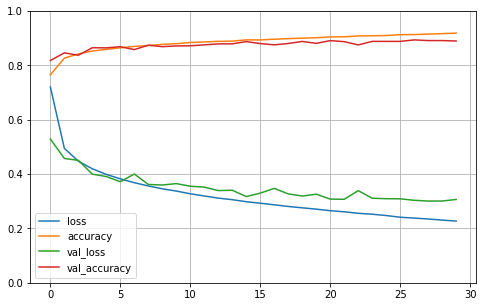

In [81]:
# the fit() method returns a History object containing all the metrics - most importantly history.history which has the metrics at the end of each epoch.
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
Model Evaluation


In [85]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3399025466918945, 0.8829]

The model does slightly worse on the test set than the validation set. This is because the parameters are not tuned to the test set. However, resist the temptation to tweak hyperparameters on the test set otherwise your estimate of the generalisation error may be too optimistic.

Using the Model to make predictions

In [90]:
# For example, take the first 3 images as test to predict.a
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Each row presesents the class predictions for each image. As we can see, the first image has a 0.99 prediction on the last class (ankle boot), second image has a 0.99 prediction on class 2 (Pullover).

In [93]:
# If you just want the single answer prediction
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [94]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')